In [ ]:
#Installed statsmodels
!pip install statsmodels==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 39.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
#Installed ISLP
!pip install ISLP==0.3.21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 16.6 MB/s et

In [ ]:
#Imported the stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pd.options.mode.copy_on_write = True

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)


In [ ]:
#Read and display the dataset
market = pd.read_csv("marketing_campaign.csv", sep ="\t")
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


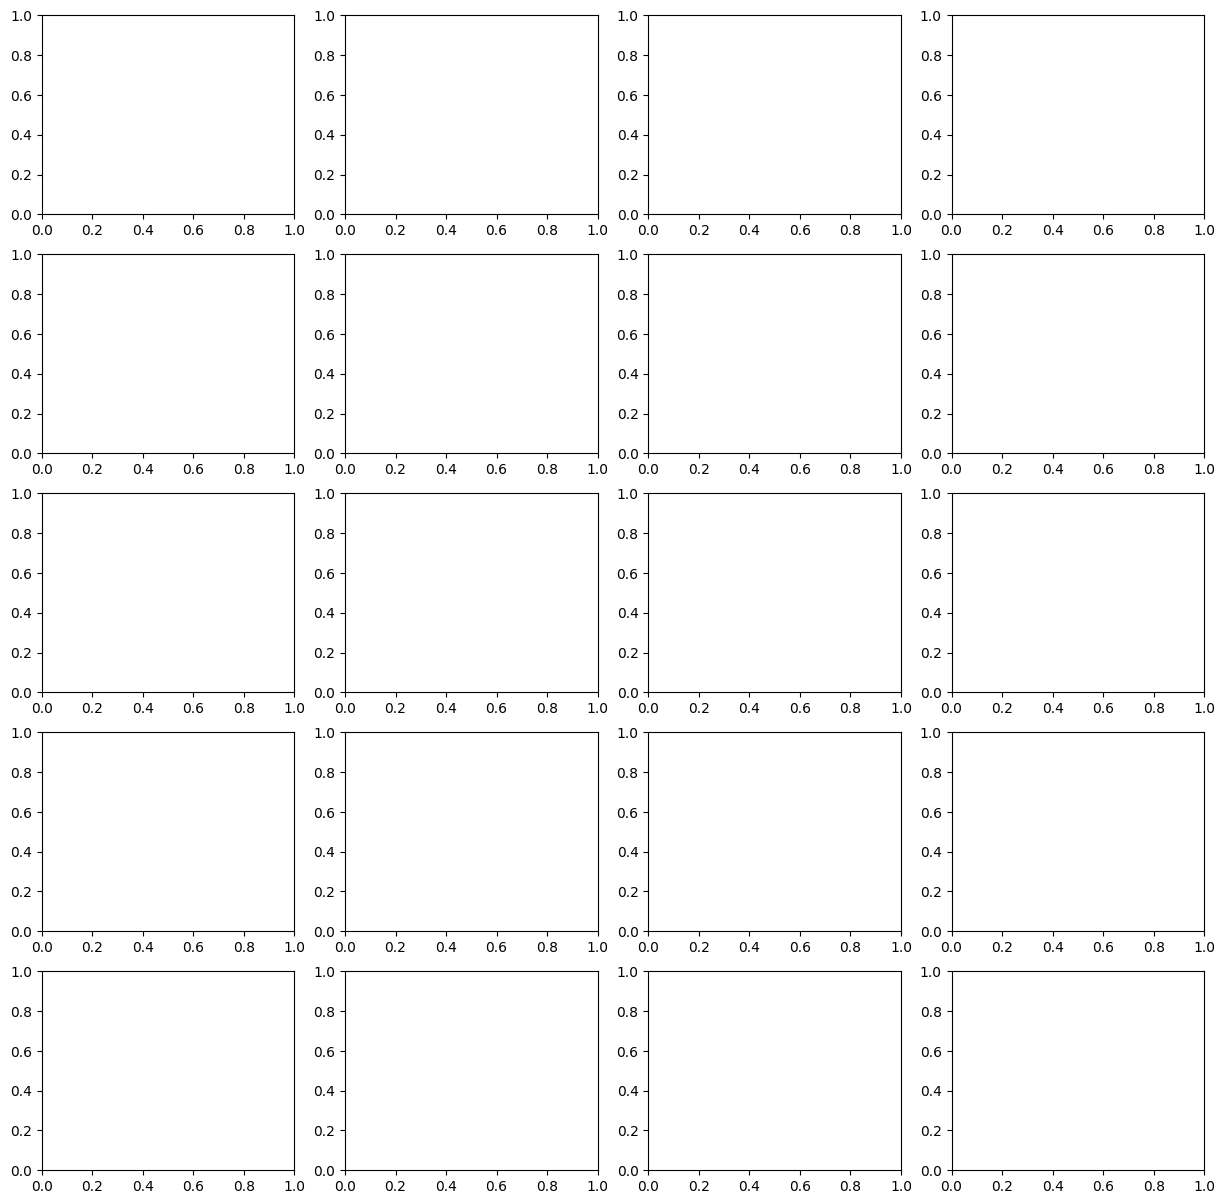

In [ ]:
# First create a subset of the columns that we want to plot
subset = market[['Year_Birth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Education','Income','Marital_Status','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
# Initialize the plots before drawing them
fig, axes = subplots(nrows=5,
ncols=4,
figsize=(15, 15))


In [ ]:
def range_to_grid(i,Ncol):
    x=[]
    y=[]
    for n in range(Ncol**2):
        x.append(int(np.floor(n/Ncol)))
        y.append(n % Ncol)
    #print(n,x[n],y[n])
    return x[i],y[i]


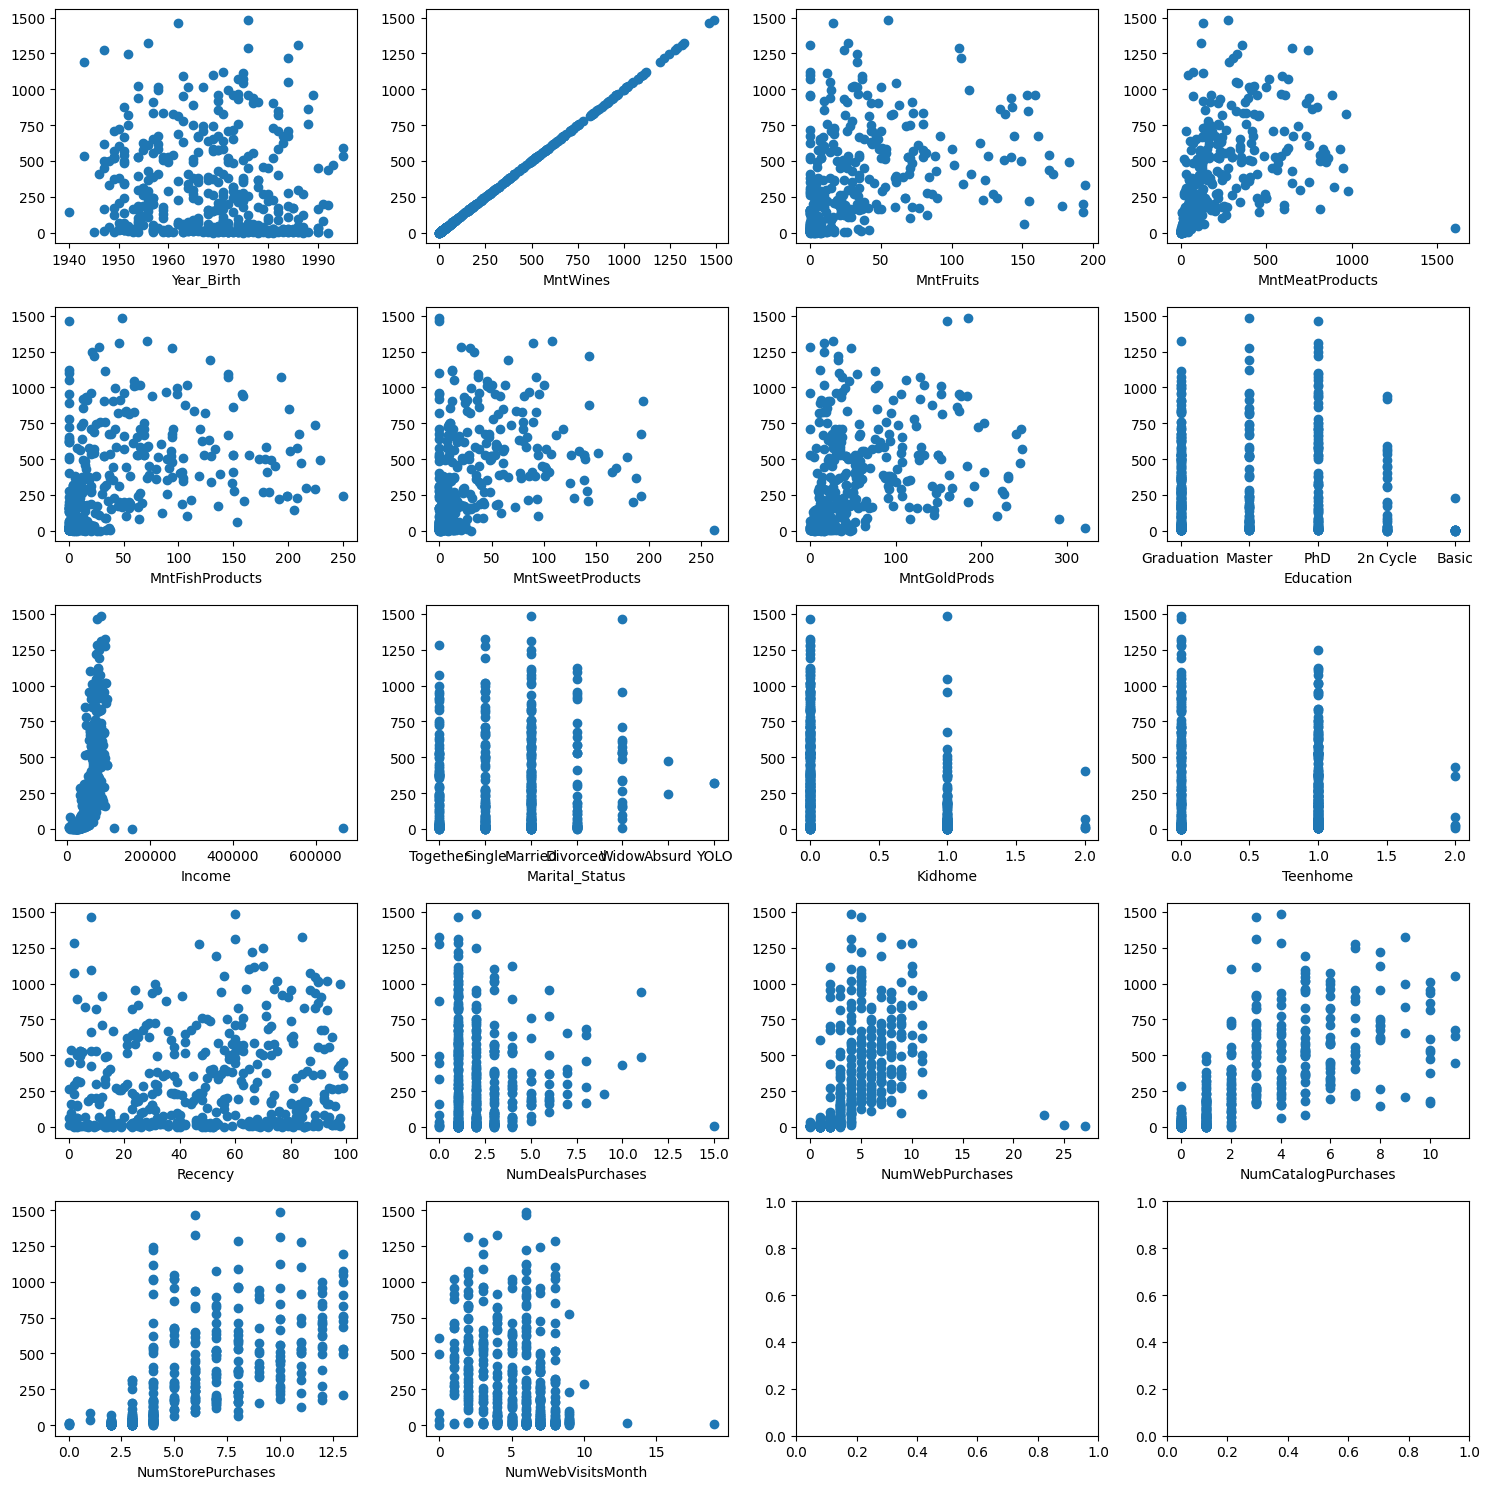

In [ ]:
import matplotlib.pyplot as plt
market = market.drop((market[:1800].index))
# Define the function to convert an index to grid position
def range_to_grid(index, num_cols):
    return (index // num_cols, index % num_cols)

# Assuming 'market' DataFrame is correctly loaded and subset is created
subset = market[['Year_Birth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Education','Income','Marital_Status','Kidhome','Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]  # Complete list of columns

# Initialize the plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

# Plot each column against 'Year_Birth'
for j in range(len(subset.columns)):
    row, col = range_to_grid(j, 4)
    axes[row, col].plot(subset.iloc[:, j], market['MntWines'], 'o')
    axes[row, col].set_xlabel(subset.columns[j])

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

In [ ]:
Market = pd.DataFrame(market)

In [ ]:
Market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,440.000000,440.000000,433.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0,440.0,440.000000
mean,5688.377273,1968.602273,53526.591224,0.411364,0.520455,48.575000,305.729545,28.006818,172.922727,39.597727,...,5.245455,0.084091,0.079545,0.079545,0.070455,0.018182,0.006818,3.0,11.0,0.165909
std,3233.017447,11.776139,36757.446619,0.515242,0.526768,29.108763,335.764435,41.237381,232.873099,55.289460,...,2.401353,0.277840,0.270896,0.270896,0.256203,0.133761,0.082384,0.0,0.0,0.372422
min,17.000000,1940.000000,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2943.250000,1958.000000,34109.000000,0.000000,0.000000,24.000000,23.000000,2.000000,15.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5590.500000,1970.000000,53204.000000,0.000000,1.000000,49.000000,178.500000,8.000000,65.000000,13.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8529.500000,1977.000000,69520.000000,1.000000,1.000000,73.000000,520.000000,37.000000,239.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11187.000000,1995.000000,666666.000000,2.000000,2.000000,99.000000,1486.000000,194.000000,1607.000000,250.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#New Dataset with Age Column and 94 and below
Market['Age'] = pd.Series(np.zeros(Market.shape[0]))
Market = Market.drop((Market[(Market['Year_Birth'] < 1930)].index))
# Market = Market.drop((Market[:1500].index))
Market.loc[Market['Year_Birth'] <2000, 'Age'] = 2024 - Market['Year_Birth']
Market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1800,2831,1976,Graduation,Together,78416.0,0,1,27-06-2014,99,453,...,0,0,0,0,0,0,3,11,0,48.0
1801,6977,1974,Graduation,Together,75702.0,0,1,14-10-2012,87,1073,...,0,0,1,0,0,0,3,11,0,50.0
1802,6289,1951,Master,Together,59385.0,1,1,28-04-2013,85,135,...,0,0,0,0,0,0,3,11,0,73.0
1803,4168,1966,Graduation,Single,37070.0,1,1,20-03-2013,30,231,...,0,0,0,0,0,0,3,11,1,58.0
1804,8397,1951,Graduation,Married,44689.0,1,1,10-01-2014,82,18,...,1,0,0,0,0,0,3,11,0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57.0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43.0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68.0


In [ ]:
#Viewing the correlation between Age and specific products
columns_of_interest = ['Age','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
Selected_market = market
Selected_market.corr(numeric_only=True)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,-0.018810,0.010918,0.041432,0.003428,-0.077588,-0.090658,-0.045977,-0.074800,-0.064139,...,0.065608,-0.046519,-0.018623,-0.053225,-0.019907,-0.027991,-0.037777,NaN,NaN,-0.022887
Year_Birth,-0.018810,1.000000,-0.091910,0.197468,-0.385907,0.034798,-0.118434,-0.016332,-0.024540,-0.028098,...,0.154737,0.091701,-0.017194,0.063494,0.025919,0.019062,-0.001894,NaN,NaN,0.016119
Income,0.010918,-0.091910,1.000000,-0.259676,-0.029309,0.017473,0.372801,0.283383,0.373968,0.288544,...,-0.363813,0.030263,0.117419,0.232980,0.180936,0.077015,0.019658,NaN,NaN,0.137284
Kidhome,0.041432,0.197468,-0.259676,1.000000,-0.035269,0.064841,-0.492436,-0.351994,-0.430688,-0.401743,...,0.465002,-0.019420,-0.186011,-0.218652,-0.168285,-0.108771,0.041102,NaN,NaN,-0.130932
Teenhome,0.003428,-0.385907,-0.029309,-0.035269,1.000000,-0.043924,-0.040029,-0.162493,-0.279548,-0.206314,...,0.104069,-0.066253,0.092331,-0.226928,-0.154169,-0.037619,0.023024,NaN,NaN,-0.197312
Recency,-0.077588,0.034798,0.017473,0.064841,-0.043924,1.000000,0.083211,0.070858,0.063594,0.003715,...,-0.050905,0.001894,0.024807,0.079982,0.048008,0.086820,-0.010187,NaN,NaN,-0.202134
MntWines,-0.090658,-0.118434,0.372801,-0.492436,-0.040029,0.083211,1.000000,0.403818,0.561400,0.408626,...,-0.297490,0.098306,0.336423,0.473387,0.294679,0.243156,0.011596,NaN,NaN,0.327200
MntFruits,-0.045977,-0.016332,0.283383,-0.351994,-0.162493,0.070858,0.403818,1.000000,0.535082,0.666896,...,-0.388886,0.016054,-0.003719,0.142485,0.155837,-0.047927,0.053627,NaN,NaN,0.156555
MntMeatProducts,-0.074800,-0.024540,0.373968,-0.430688,-0.279548,0.063594,0.561400,0.535082,1.000000,0.600765,...,-0.501531,0.062733,0.101780,0.345515,0.294304,0.037853,0.056307,NaN,NaN,0.334267
MntFishProducts,-0.064139,-0.028098,0.288544,-0.401743,-0.206314,0.003715,0.408626,0.666896,0.600765,1.000000,...,-0.461751,-0.025374,0.010050,0.181451,0.239359,-0.031042,0.011606,NaN,NaN,0.167528


In [ ]:
Selected_market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,440.000000,440.000000,433.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0,440.0,440.000000
mean,5688.377273,1968.602273,53526.591224,0.411364,0.520455,48.575000,305.729545,28.006818,172.922727,39.597727,...,5.245455,0.084091,0.079545,0.079545,0.070455,0.018182,0.006818,3.0,11.0,0.165909
std,3233.017447,11.776139,36757.446619,0.515242,0.526768,29.108763,335.764435,41.237381,232.873099,55.289460,...,2.401353,0.277840,0.270896,0.270896,0.256203,0.133761,0.082384,0.0,0.0,0.372422
min,17.000000,1940.000000,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2943.250000,1958.000000,34109.000000,0.000000,0.000000,24.000000,23.000000,2.000000,15.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5590.500000,1970.000000,53204.000000,0.000000,1.000000,49.000000,178.500000,8.000000,65.000000,13.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8529.500000,1977.000000,69520.000000,1.000000,1.000000,73.000000,520.000000,37.000000,239.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11187.000000,1995.000000,666666.000000,2.000000,2.000000,99.000000,1486.000000,194.000000,1607.000000,250.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
X = Market[['Income', 'Education', 'Recency','Kidhome']]
y = Market['MntWines']

In [ ]:
X['intercept'] = np.ones(Market.shape[0])
X

,Income,Education,Recency,Kidhome,intercept
1800,78416.0,Graduation,99,0,1.0
1801,75702.0,Graduation,87,0,1.0
1802,59385.0,Master,85,1,1.0
1803,37070.0,Graduation,30,1,1.0
1804,44689.0,Graduation,82,1,1.0
...,...,...,...,...,...
2235,61223.0,Graduation,46,0,1.0
2236,64014.0,PhD,56,2,1.0
2237,56981.0,Graduation,91,0,1.0
2238,69245.0,Master,8,0,1.0


In [ ]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

In [ ]:
# Spot check the train and test sets

print(X_train.head()) 
print(X_train.shape)
print()
print(y_train.head()) 
print(y_train.shape)
print() 
print(X_test.head()) 
print(X_test.shape)
print() 
print(y_test.head())
print(y_test.shape)
print() 
print(Train.head())
print(Train.shape)
print() 
print(Test.head())
print(Test.shape)

       Income   Education  Recency  Kidhome  intercept
2223  33562.0      Master       33        1        1.0
1870  26642.0         PhD       71        1        1.0
2174  65210.0  Graduation       25        0        1.0
1925  22701.0      Master        2        1        1.0
1908  35701.0  Graduation       36        0        1.0
(330, 5)

2223     21
1870     13
2174    626
1925      2
1908     21
Name: MntWines, dtype: int64
(330,)

       Income   Education  Recency  Kidhome  intercept
2097  54252.0  Graduation       25        1        1.0
1903  29819.0  Graduation       77        1        1.0
2010  71964.0  Graduation       81        0        1.0
2211  88325.0  Graduation       42        0        1.0
1882  50616.0         PhD       56        0        1.0
(110, 5)

2097    178
1903      9
2010    587
2211    519
1882    128
Name: MntWines, dtype: int64
(110,)

    Income   Education  Recency  Kidhome  intercept  MntWines
0  78416.0  Graduation       99        0        1.0       453
1 

In [ ]:
# Look at possible values and spot check for missing entries

print('Income')
print(np.unique(Train['Income']))
print('Wine')
print(np.unique(Train['MntWines']))
print('Recency')
print(np.unique(Train['Recency']))
print('Kidhome')
print(np.unique(Train['Kidhome']))
print('Education')
print(np.unique(Train['Education']))


Income
[  4023.   5305.   7144.   7500.   8820.  11012.  11448.  13672.  14188.
  14796.  14918.  15253.  16005.  16185.  17148.  17649.  18701.  20180.
  20587.  21024.  21059.  21840.  22148.  22280.  22390.  22669.  22701.
  22979.  23272.  23477.  23539.  23763.  23830.  24206.  24434.  24570.
  25008.  25176.  25224.  25293.  25410.  25509.  25818.  26642.  27071.
  27469.  27889.  28320.  28420.  28427.  28587.  29009.  29236.  29435.
  29478.  29543.  29672.  29732.  30261.  30298.  30368.  30396.  30538.
  30828.  30992.  31158.  31385.  31535.  31560.  31761.  31878.  32146.
  32583.  32632.  32644.  32765.  32871.  33051.  33235.  33316.  33562.
  33590.  34109.  34176.  34242.  34350.  34421.  34445.  34529.  34600.
  34984.  35701.  35788.  36038.  36065.  36781.  36790.  36807.  36927.
  36997.  37070.  37150.  37284.  37509.  37758.  38054.  38236.  38361.
  38680.  38946.  39146.  39791.  39898.  40101.  40794.  40851.  41275.
  41638.  41713.  41769.  42000.  42081.  42

In [ ]:
Train.corr(numeric_only=True)

,Income,Recency,Kidhome,intercept,MntWines
Income,1.000000,-0.019947,-0.235988,NaN,0.325459
Recency,-0.019947,1.000000,0.074136,NaN,0.064454
Kidhome,-0.235988,0.074136,1.000000,NaN,-0.494647
intercept,NaN,NaN,NaN,NaN,NaN
MntWines,0.325459,0.064454,-0.494647,NaN,1.000000


In [ ]:
model_kids = sm.OLS(y_train, X_train[['intercept','Kidhome']])
results_kids = model_kids.fit()
summarize(results_kids)

/root/venv/lib/python3.9/site-packages/ISLP/models/__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
intercept,434.5134,20.547,21.147,0.0
Kidhome,-321.7364,31.213,-10.308,0.0


In [ ]:
# We can also assess the overall fit of the model

print('R^2 on train:',results_kids.rsquared)

R^2 on train: 0.2446761427959825


In [ ]:
# Create helper functions for computing the mean squared error

def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

In [ ]:
# Let's compute the MSE on the training and test sets

predictions_kids_train = predict(X_train[['intercept', 'Kidhome']], results_kids)
print('mse train:',mse(y_train, predictions_kids_train))
predictions_kids_test = predict(X_test[['intercept', 'Kidhome']], results_kids)
print('mse test:',mse(y_test, predictions_kids_test))

mse train: 84993.8774330566
mse test: 85891.91154270785


In [ ]:
# Define a function to draw a line given coefficients [credit to Hastie & Tibshirani]

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/tmp/ipykernel_83/3022399086.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_kids.params[0],
/tmp/ipykernel_83/3022399086.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_kids.params[1],


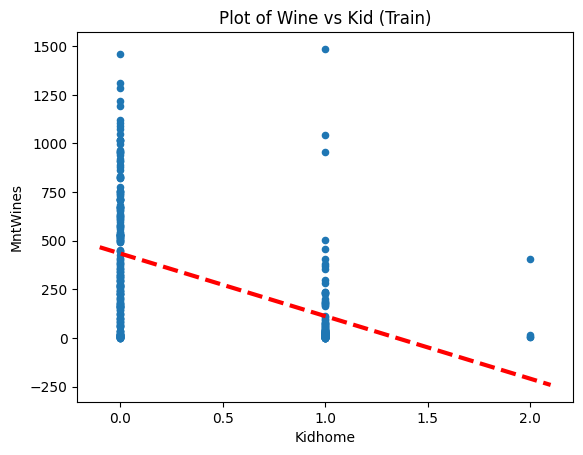

In [ ]:
# Plot TV vs sales on training set

ax = Train.plot.scatter('Kidhome', 'MntWines')
ax.set_title("Plot of Wine vs Kid (Train)")
abline(ax,
       results_kids.params[0],
       results_kids.params[1],
       'r--',
       linewidth=3)

/tmp/ipykernel_83/1651210005.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_kids.params[0],
/tmp/ipykernel_83/1651210005.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results_kids.params[1],


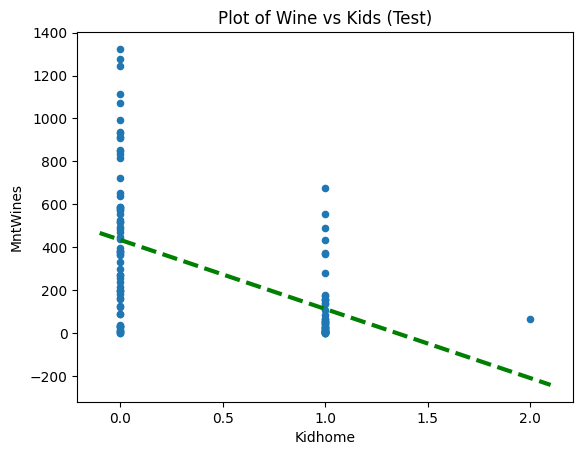

In [ ]:
# Plot TV vs sales on test set

ax = Test.plot.scatter('Kidhome', 'MntWines')
ax.set_title("Plot of Wine vs Kids (Test)")
abline(ax,
       results_kids.params[0],
       results_kids.params[1],
       'g--',
       linewidth=3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=860550e2-e635-4d90-a14f-a0d8a87ba0f0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>